In [3]:
import configparser

In [4]:
conf=configparser.ConfigParser()

In [6]:
conf.read('cufig.ini')

['cufig.ini']

In [8]:
conf.sections()

['计算规模', '初始值', '中间过程', '结果输出']

In [23]:
dict(conf.items('计算规模'))

{'宽度': '400', '计算时间': '10000', '长度': '400'}

In [21]:
conf.get('计算规模','长度')

'400'

In [24]:
for dog in conf.sections():
    print(dog)

计算规模
初始值
中间过程
结果输出


In [32]:
def decodeconf(path):
    conf=configparser.ConfigParser()
    conf.read(path)
    reslist=[]
    selist=conf.sections()
    for dog in selist:
        reslist+=conf.items(dog)
    dic=dict(reslist)
    return dic
        

In [33]:
print(decodeconf('cufig.ini'))

{'长度': '400', '宽度': '400', '计算时间': '10000', '自动初值': '否', 'p0路径': '', 'vx路径': '', 'vz路径': '', 'm': '666', '添加方式': '', '输出频率': '', '输出路径': ''}


In [34]:
import numpy as np

In [47]:
conf=decodeconf('cufig.ini')

initz0 = conf['z0路径']
z0=np.load(initz0)

m=conf['m']

outf=conf["输出频率"]

if z0.dtype == 'float32':
    print("OK")
if conf['自动初值']=='是' or conf['自动初值']=='y' or conf['自动初值']=='y':
    print('开始自动生成')
    p0=np.zeros(np.shape(z0),dtype='float32')
    vx=np.zeros(np.shape(z0),dtype='float32')
    vz=np.zeros(np.shape(z0),dtype='float32')
    print('自动生成成功')
else:
    initp0=conf['p0路径']
    p0=np.load(initp0)
    if z0.dtype == 'float32':
        print(str(initp0)+'导入成功')
    else:
        print("警告:数据类型错误。")
            
    initvx=conf['vx路径']
    vx=np.load(initvx)
    if vx.dtype == 'float32':
        print(str(initvx)+'导入成功')
    else:
        print("警告:数据类型错误。")
    initvz=conf['vz路径']
    vz=np.load(initvz)
    if vz.dtype == 'float32':
        print(str(initvz)+'导入成功')
    else:
        print("警告:数据类型错误。")
    

    
    
        

OK
开始自动生成
自动生成成功


In [43]:
p0=np.zeros(np.shape(z0),dtype='float32')

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [38]:
a=np.load('./res/p0_70.npy')

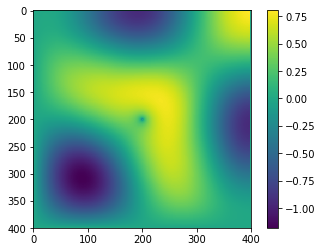

In [39]:
a[200,200]=0
plt.imshow(a)

plt.colorbar()

In [16]:
a

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       ...,
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0., nan, nan, ..., nan, nan,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [17]:
b=np.load('dogz.npy')

In [19]:
b=b+1

In [20]:
b

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [22]:
np.save('dogz.npy',b)